c:\Users\user\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-ic
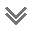

In [1]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup("https://www.worldometers.info/coronavirus/", 'html.parser')
# getting the data
soup = requests.get(url)   
soup
# extracting the entire data in its text form
code = soup.text
# converting the text into readable lxml format
lxml_code = BeautifulSoup(code,'lxml')
lxml_code

xml -  is a browser readable format

In [2]:
table_code = lxml_code.table
tags = table_code.find_all('tr')
tags

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [3]:
raw_data = []
for tag in tags:
    x = tag.text.split('\n')[1:-1]
    if x[1] != "":
        raw_data.append(x)
raw_data


[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop'],
 ['',
  'World',
  '651,183,136',
  '+295,583',
  '6,650,423',
  '+545',
  '627,709,946',
  '+166,102',
  '16,822,767',
  '37,090',
  '83,541',
  '853.2',
  '',
  '',
  '',
  'All',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['1',
  'USA',
  '100,962,660',
  '',
  '1,107,794                                ',
  '',
  '98,374,922',
  '',
  '1,479,944',
  '3,495',
  '301,556',
  '3,309',
  '1,143,194,153',
  '3,414,505',
  '334,805,269 ',
  'North America',
  '',
  '33020',
  '',
  '',
  '4,420'],
 ['2',
  'India',
  '44,674,874',
  '',
  '530,638                

In [4]:
import csv
with open('covid.csv','w')as file:
    x = csv.writer(file)
    x.writerows(raw_data)

In [5]:
import pandas as pd
df = pd.read_csv("covid.csv",encoding ='ISO-8859-1')
df.head()

,,,,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/,1M pop,Unnamed: 15,Population,Continent,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
NaN,World,"651,183,136","+295,583","6,650,423",545.0,"627,709,946","+166,102","16,822,767","37,090","83,541",853.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,USA,"100,962,660",NaN,"1,107,794",NaN,"98,374,922",NaN,"1,479,944","3,495","301,556","3,309","1,143,194,153","3,414,505",...,NaN,33020,NaN,NaN,"4,420",NaN,NaN,NaN,NaN,NaN
2.0,India,"44,674,874",NaN,"530,638",NaN,"44,139,056",NaN,"5,180",698,"31,760",377,"907,643,809","645,260",...,NaN,"312,6512",NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
3.0,France,"38,184,081",NaN,"159,362",NaN,"37,057,677",NaN,"967,042",869,"582,212","2,430","271,490,188","4,139,547",...,NaN,24120,NaN,NaN,"14,745",NaN,NaN,NaN,NaN,NaN
4.0,Germany,"36,649,979",NaN,"158,559",NaN,"35,986,500","+33,100","504,920","1,406","436,915","1,890","122,332,384","1,458,359",...,NaN,25291,NaN,NaN,"6,019",NaN,NaN,NaN,NaN,NaN


In [6]:
country = list(df['#'][1:10])
total_case = list(df['Country,Other'][1:10])
total_cases = []
for i in total_case:
    x = int(i.replace(',',''))
    total_cases.append(x)

total_cases
    

AttributeError: 'float' object has no attribute 'replace'

In [ ]:
# data visualisation
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x = country, y=total_cases)])
fig.update_layout(
    title = "Total covid cases per country",
    xaxis_title="Country",
    yaxis_title = "No. of cases"    
)
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=country, values=total_cases)])
fig.show()

In [ ]:
git@github.com:Riyaaa1/Python.git